# Monte Carlo and Sampling Methods

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import random
import numpy as np
import pandas as pd
from tqdm import tqdm, trange # prints a nice loading bar for the notebook
import timeit
from numba import jit
import copy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## <span style="color:Orange">Introduction</span>

Monte Carlo (MC) integration and other sampling techniques are important tools for computing complex intgerals that arising in many areas of science. In this lecture, we will study Monte Carlo integration methods and re-visit Markov Chain MC with some specific physics examples.

## <span style="color:Orange">Monte Carlo Integration</span>

Numerical integration uses the rectangle approximation to find the area under a curve.  The analytical notation we are used to seeing for a definite integral

$$ \Large
F = \int_a^b f(x) dx
$$

can be expressed as a [numerical approximation that adds up $n$ rectangles under the curve $f(x)$](https://mathworld.wolfram.com/NumericalIntegration.html).  The more rectangles used to calculate the area, the better the approximation becomes.

Monte Carlo Integration is a process of solving integrals having numerous values to integrate upon. The Monte Carlo process uses the theory of large numbers and random sampling to approximate values that are very close to the actual solution of the integral.

Monte Carlo Integration improves above the integration approach by randomly picking which rectangles to add up next and approximating $F$ as $\langle F^N \rangle$:

$$ \Large
\langle F^N \rangle = ~\frac{1}{N} \sum_{i=1}^{N} \frac{f(X_i)}{p(X_i)} \\
~~~~~~~~~~~~~~~ = ~\frac{1}{N} \sum_{i=1}^{N} \frac{f(X_i)}{1 / (b-a)} \\
~~~~~~~~~~~~~~~ = ~\frac{b-a}{N} \sum_{i=1}^{N} f(X_i)
$$
$$ \Large
\Rightarrow
~~~\boxed{\langle F^N \rangle = \frac{b-a}{N} \sum_{i=1}^{N} f(X_i)} ~~~~~~~~~~~~~ \text{(Monte Carlo Estimator)}
$$

where $N$ is the number of times a new value $X_i$ is chosen from a probability distribution for range $a$ to $b$.  Therefore,

$$ \Large
{\text{lim}}_{N→∞} \langle F^N \rangle = F
$$

The question becomes, what is the best way to choose $X_i$ to match the real system?  The goal is to get the best approximation as quickly as possible.

---

___<span style="color:Violet">EXAMPLE</span>___: Lets appoximate the definite integral using the Monte Carlo integration method:
$$ \Large
\int \limits_0^\pi \sin x ~dx
$$

In [2]:
# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# array of zeros of length N
ar = np.zeros(N)

# iterating over each Value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):
	ar[i] = random.uniform(a,b)

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# iterates and sums up values of different functions
# of x
for i in ar:
	integral += f(i)

# we get the answer by the formula derived adobe
ans = (b-a)/float(N)*integral

# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))


The value calculated by monte carlo integration is 2.0485802989063675.


The value obtained is very close to the actual answer of the integral which is 2.0.

Now if we want to visualize the integration using a histogram, we can do so by using the matplotlib library. Again we import the modules, define the limits of integration and write the sin function for calculating the sin value for a particular value of x. Next, we take an array that has variables representing every bin of the histogram. Then we iterate through N values and repeat the same process of creating a zeros array, filling it with random x values, creating an integral variable adding up all the function values, and getting the answer N times, each answer representing a bin of the histogram.

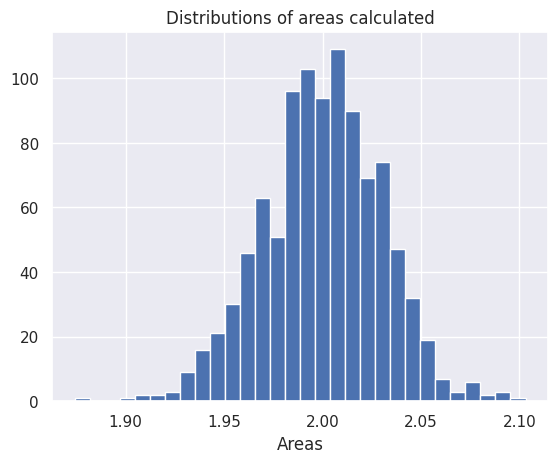

mean of values: 1.9999473910652965
variance of values: 0.0009188921649641422
standard dev. of values: 0.030313234155466523


In [8]:
# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):

	#array of zeros of length N
	ar = np.zeros(N)

	# iterating over each Value of ar and filling it
	# with a random value between the limits a and b
	for i in range (len(ar)):
		ar[i] = random.uniform(a,b)

	# variable to store sum of the functions of different
	# values of x
	integral = 0.0

	# iterates and sums up values of different functions
	# of x
	for i in ar:
		integral += f(i)

	# we get the answer by the formula derived adobe
	ans = (b-a)/float(N)*integral

	# appends the solution to a list for plotting the graph
	plt_vals.append(ans)

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
plt.hist (plt_vals, bins=30, ec="black")

# to be made, bins, separators colour between the
# beams)
# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot

print("mean of values:", np.mean(plt_vals))
print("variance of values:", np.var(plt_vals))
print("standard dev. of values:", np.std(plt_vals))


---

___<span style="color:Violet">EXAMPLE</span>___: Lets appoximate the definite integral
$$ \Large
\int \limits_0^1 x^2 ~dx
$$

In [9]:
# limits of integration
a = 0
b = 1
N = 1000

# array of zeros of length N
ar = np.zeros(N)

# iterating over each Value of ar and filling
# it with a random value between the limits a
# and b
for i in range(len(ar)):
	ar[i] = random.uniform(a, b)

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
	return x**2

# iterates and sums up values of different
# functions of x
for i in ar:
	integral += f(i)

# we get the answer by the formula derived adobe
ans = (b-a)/float(N)*integral

# prints the solution
print("The value calculated by monte carlo integration is {}.".format(ans))

The value calculated by monte carlo integration is 0.3298862810386129.


And then visualize:

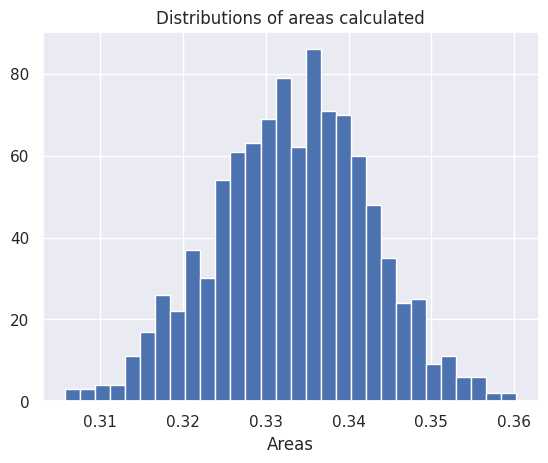

In [10]:
# limits of integration
a = 0
b = 1
N = 1000

# function to calculate x^2 of a particular value
# of x
def f(x):
	return x**2

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):

	# array of zeros of length N
	ar = np.zeros(N)

	# iterating over each Value of ar and filling
	# it with a random value between the limits a
	# and b
	for i in range (len(ar)):
		ar[i] = random.uniform(a,b)

	# variable to store sum of the functions of
	# different values of x
	integral = 0.0

	# iterates and sums up values of different functions
	# of x
	for i in ar:
		integral += f(i)

	# we get the answer by the formula derived adobe
	ans = (b-a)/float(N)*integral

	# appends the solution to a list for plotting the
	# graph
	plt_vals.append(ans)

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
# to be made, bins, separators colour between
# the beams)
plt.hist (plt_vals, bins=30, ec="black")

# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot


---

### <span style="color:LightBlue">Multidimensional Monte Carlo integration and variance scaling</span>

We can estimate the Monte Carlo variance of the approximation as
$$ \Large
v_N = \frac{1}{N^2} \sum_{i=1}^N \Biggl[ (f(x_i) - \bar{f_N})^2 \Biggr]
$$

Also, from the Central Limit Theorem,
$$ \Large
\frac{\bar{f_N} - E[f(X)]}{\sqrt{v_N}} \sim \mathcal{N}(0, 1)
$$

The convergence of Monte Carlo integration is $O(\sqrt{N})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $O(N^d)$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

___<span style="color:Violet">EXAMPLE</span>___: 3-D Integration

$$ \Large
\int\limits_{x_0}^{x_1} ~ \int\limits_{y_0}^{y_1} ~ \int\limits_{z_0}^{z_1} f(x, y, z) dx~dy~dz$$

Uniform 3-D random variable:
$$\Large
X_i \sim p(x,y,z) = \frac{1}{x_1 - x_0} ~ \frac{1}{y_1 - y_0} ~ \frac{1}{z_1 - z_0}
$$

Basic 3-D estimator:
$$ \Large
F_N = \frac{(x_1 - x_0)(y_1 - y_0)(z_1 - z_0)}{N} ~ \sum\limits_{i=1}^{N} f(X_i)
$$

This generalizes to abitrary N-dimensional PDFs

### <span style="color:LightBlue">Variance and Bias in Monte Carlo integration</span>

We are often interested in knowing how many iterations it takes for Monte Carlo integration to “converge” and the accuracy of the calculation. To do this, we would like some estimate of the variance and to ensure it is unbiased. It is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

___<span style="color:Violet">EXAMPLE</span>___: Using Monte Carlo methods, estimate the integral of the function
$$ \Large
f(x) = x \cos 7x + \sin 13x, \ \ \ 0 \le x \le 1
$$

In [11]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

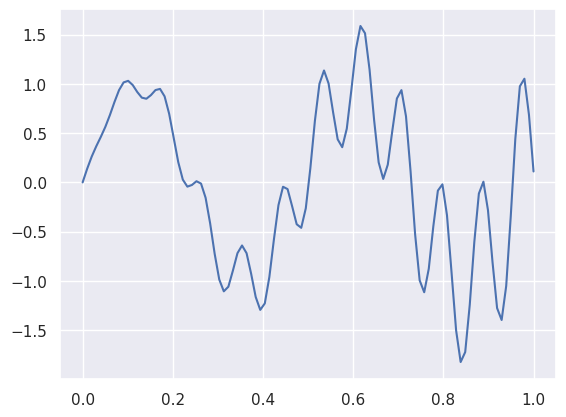

In [12]:

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
pass

#### <span style="color:Tan">Single Monte Carlo estimate</span>

In [13]:
n = 100
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
print(y)

0.015360253803206578


#### <span style="color:Tan">Using multiple independent sequences to monitor convergence</span>

We vary the sample size from 1 to 100 and calculate the value of $y=\sum x / n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

In [24]:
n = 100
reps = 1000

input = np.random.random((n,reps))
x = f(input)
print("input:",input[:5])
print("input shape",input.shape)
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0) #cumsum like this returns the sum over rows from that & previous rows in the array
print("y shape:",y.shape)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

input: [[0.30164315 0.0661625  0.04822206 ... 0.4176316  0.34726022 0.48230351]
 [0.92165343 0.26978259 0.03479995 ... 0.01109372 0.4819727  0.05703475]
 [0.45159834 0.50180236 0.30372076 ... 0.91056549 0.6813393  0.13822086]
 [0.16343706 0.9252276  0.02538198 ... 0.81945888 0.73165032 0.93240206]
 [0.90115956 0.50940493 0.00827059 ... 0.35076757 0.65972166 0.2783756 ]]
input shape (100, 1000)
y shape: (100, 1000)


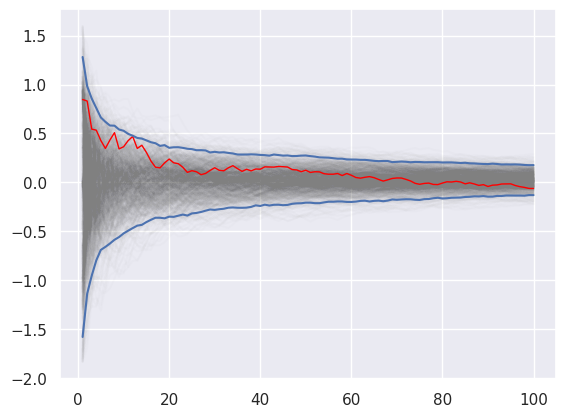

In [21]:
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')
pass

#### <span style="color:Tan">Proof that Monte Carlo Estimator is Unbiased</span>

It is straightforward to prove that the expectation value of the Monte Carlo estimator is the desired integral (i.e. it is unbiased).

First recall some properties of the expectation value $E$:
$$ \Large
E ~ \Biggl[ \sum\limits_i Y_i \Biggr] = \sum\limits_i E\bigl[ Y_i \bigr]   ~~~~~~~~~~~~~~~~~~~~~ E~\Bigl[ aY \Bigr] = a E~\Bigl[ Y \Bigr]
$$

Then
$$ \Large E~\Bigl[ F_N \Bigr] = E ~ \Biggl[ \frac{1}{N} ~ \sum\limits_{i=1}^N \frac{f(X_i)}{p(X_I)} \Biggr] \\
~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~E~ \Biggl[ \frac{f(X_i)}{p(X_I)} \Biggr] \\
~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~\int\limits_a^b \frac{f(x)}{p(x)} ~p(x) ~dx \\
~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~\int\limits_a^b f(x)  ~dx \\
~~ = \int\limits_a^b f(x)  ~dx \\
$$

---

### <span style="color:LightBlue">Change of Variables</span>

The Cauchy distribution is given by
$$ \Large
f(x) = \frac{1}{\pi (1 + x^2)}, \ \ -\infty \lt x \lt \infty
$$

Suppose we want to integrate the tail probability $P(X>3)$ using Monte Carlo. One way to do this is to draw many samples form a Cauchy distribution, and count how many of them are greater than 3, but this is extremely inefficient.

Only 10% of samples will be used

In [25]:
h_true = 1 - stats.cauchy().cdf(3)
print(h_true)

0.10241638234956674


In [26]:
n = 100

x = stats.cauchy().rvs(n)
h_mc = 1.0/n * np.sum(x > 3)
h_mc, np.abs(h_mc - h_true)/h_true

(np.float64(0.08), np.float64(0.21887496741542117))

#### <span style="color:Tan">A change of variables lets us use 100% of draws</span>

We are trying to estimate the quantity
$$ \Large
\int_3^\infty \frac{1}{\pi (1 + x^2)} dx
$$

Using the substitution $y=3/x$ (and a little algebra), we get
$$ \Large
\int_0^1 \frac{3}{\pi(9 + y^2)} dy
$$

Hence, a much more efficient MC estimator is
$$ \Large
\frac{1}{n} \sum_{i=1}^n \frac{3}{\pi(9 + y_i^2)}
$$

where $y_i \sim \mathcal{N}(0,1)$

In [27]:
y = stats.uniform().rvs(n)
h_cv = 1.0/n * np.sum(3.0/(np.pi * (9 + y**2)))
h_cv, np.abs(h_cv - h_true)/h_true

(np.float64(0.1026729035174522), np.float64(0.0025046888202896016))

Here the deviation from the truth is reduced by a factor of ~100.  Of course, this requires an analytic function that you can change the variables on.

### <span style="color:LightBlue">Monte Carlo Swindles</span>

Apart from change of variables, there are several general techniques for variance reduction, sometimes known as Monte Carlo "swindles" since these methods improve the accuracy and convergence rate of Monte Carlo integration without increasing the number of Monte Carlo samples. Some Monte Carlo swindles are:

- importance sampling

- stratified sampling

- control variates

- antithetic variates

- conditioning swindles including Rao-Blackwellization and independent variance decomposition

Most of these techniques are not particularly computational in nature, so we will not cover them in the course. I expect you will learn them elsewhere. We will illustrate importance sampling and antithetic variables here as examples.

#### <span style="color:Tan">Antithetic variables</span>

The idea behind antithetic variables is to choose two sets of random numbers that are negatively correlated, then take their average, so that the total variance of the estimator is smaller than it would be with two sets of independent and identically distributed (IID) random variables.

Recall that the variance is:
$$Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y) $$
so if $Cov(x,y) < 1$ than the variance $Var(X+Y)$ is
reduced compared to when the samples are independent.

In [28]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [29]:
from sympy import sin, cos, symbols, integrate

x = symbols('x')
sol = integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(16)
print(sol)

0.02025493910239406


Using just vanilla Monte Carlo:

In [30]:
n = 10000
u = np.random.random(n)
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(np.float64(0.013165106557791814), 0.3500298129143352)

Using antithetic variables for the first half of $u$ supplemented with $1-u$:

In [31]:
u = np.r_[u[:n//2], 1-u[:n//2]]
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(np.float64(0.014379940898756948), 0.2900526224214965)

This works because the random draws are now negatively correlated, and hence the sum of the variances will be less than in the IID case, while the expectation is unchanged.

#### <span style="color:Tan">Importance Sampling</span>

Ordinary Monte Carlo sampling evaluates

$$ \Large
E[g(X)] = \int_X g(x)\, p(x) \, dx
$$

Using another distribution $h(x)$ which is the so-called “importance function”, we can rewrite the above expression as an expectation with respect to $h$

$$ \Large
E_p[f(x)] \ = \ \int_X f(x) \frac{p(x)}{h(x)} h(x) dx \ = \ E_h\left[ \frac{f(X) p(X)}{h(X)} \right]
$$

giving us the new estimator

$$ \Large
\bar{f_n} = \frac{1}{N} \sum_{i=1}^n \frac{p(x_i)}{h(x_i)} f(x_i)
$$

where $x_i \sim f$ is a draw from the density $h$.

This is helpful if the distribution $h$ has a similar shape as the function $f(x)$ that we are integrating over, since we will draw more samples from places where the integrand makes a larger or more “important” contribution. This is very dependent on a good choice for the importance function $h$.

Two simple choices for $h$ are scaling

$$ \Large
h(x) = \frac{1}{a} ~p(x/a)
$$

and translation

$$ \Large
h(x) = p ~(x - a)
$$

In these cases, the parameter a is typically chosen using some adaptive algorithm, giving rise to adaptive importance sampling. Alternatively, a different distribution can be chosen as shown in the example below.

---

___<span style="color:Violet">EXAMPLE</span>___: Suppose we want to estimate the tail probability of $\mathcal{N}(0,1)$ for $P(X>5)$.

Regular MC integration using samples from $\mathcal{N}(0,1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling.

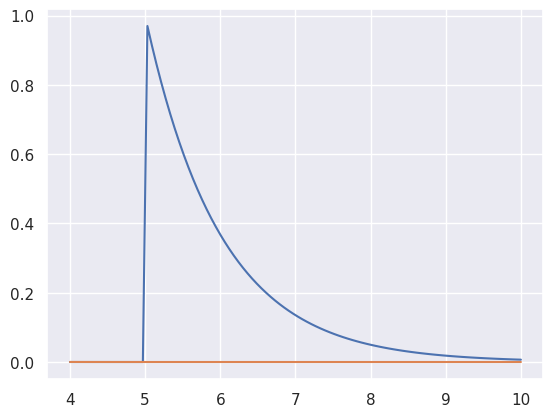

In [32]:
x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm(loc=0).pdf(x))
pass

#### <span style="color:Tan">Expected answer</span>

We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0,1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0,1)$ is hopelessly inefficient for Monte Carlo integration.

In [33]:
%precision 10

'%.10f'

In [34]:
h_true = 1 - stats.norm().cdf(5)
h_true

np.float64(2.866515719235352e-07)

#### <span style="color:Tan">Using direct Monte Carlo integration</span>

In [35]:
n = 10000
y = stats.norm().rvs(n)
h_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(np.float64(0.0), np.float64(1.0))

#### <span style="color:Tan">Using importance sampling</span>

In [36]:
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(np.float64(2.904933940278452e-07), np.float64(0.013402410733455904))

---

### <span style="color:LightBlue">Vegas Method</span>

The VEGAS algorithm, due to G. Peter Lepage, is a method for reducing error in Monte Carlo simulations by using a known or approximate probability distribution function to concentrate the search in those areas of the integrand that make the greatest contribution to the final integral.

The VEGAS algorithm is based on importance sampling. It samples points from the probability distribution described by the function $|f|$ so that the points are concentrated in the regions that make the largest contribution to the integral

___<span style="color:Violet">EXAMPLE</span>___: 4-D Monte Carlo integration with Vegas

Here we illustrate the use of [vegas](https://vegas.readthedocs.io/en/latest/vegas.html#module-vegas) by estimating the following integral:
$$ \Large
C \int\limits_{-1}^{1} ~dx_0 ~ \int\limits_{0}^{1} ~dx_1 ~ \int\limits_{0}^{1} ~dx_2 ~ \int\limits_{0}^{1} ~dx_3 ~ e^{-100 \sum_d (x_d - 0.5)^2}
$$

First we define the integrand $f(x)$ where $x[d]$ specifies a point in the 4-dimensional space.

We then create an integrator `integ` which is an integration operator that can be applied to any 4-dimensional function. It is where we specify the integration volume.

Finally we apply `integ` to our integrand $f(x)$, telling the integrator to estimate the integral using `nitn=10` iterations of the vegas algorithm, each of which uses no more than `neval=1000` evaluations of the integrand. Each iteration produces an independent estimate of the integral.

The final estimate is the weighted average of the results from all 10 iterations, and is returned by `integ(f ...)`. The call `result.summary()` returns a summary of results from each iteration.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.3 MB/s eta 0:00:00
itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.015(26)       1.015(26)           0.00     1.00
  2   1.034(19)       1.028(15)           0.38     0.54
  3   1.021(15)       1.024(10)           0.25     0.78
  4   1.031(13)       1.0269(80)          0.22     0.88
  5   1.014(11)       1.0222(64)          0.40     0.81
  6   0.986(12)       1.0143(57)          1.72     0.13
  7   1.020(11)       1.0155(50)          1.47     0.18
  8   1.010(12)       1.0146(46)          1.29     0.25
  9   0.994(13)       1.0122(43)          1.42     0.18
 10   0.988(13)       1.0098(41)          1.61     0.11

result = 1.0098(41)    Q = 0.11


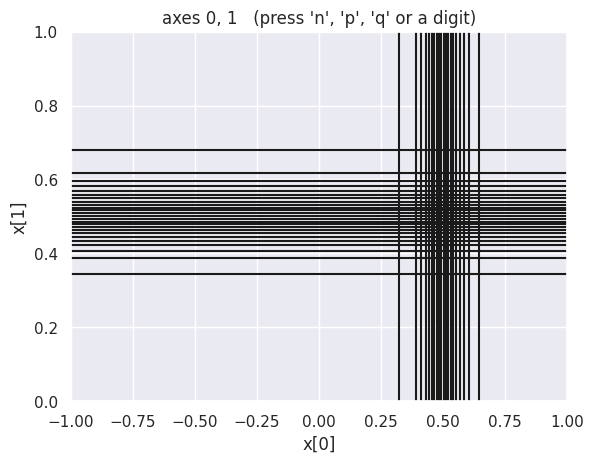

In [37]:
!pip install vegas

import vegas

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return np.exp(-dx2 * 100.) * 1013.2118364296088

# seed the random number generator so results reproducible
np.random.seed((1, 2, 3))

# assign integration volume to integrator
integ = vegas.Integrator([[-1., 1.], [0., 1.], [0., 1.], [0., 1.]])

# adapt to the integrand; discard results
integ(f, nitn=5, neval=1000)

# do the final integral
result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
integ.map.show_grid(20)


### <span style="color:LightBlue">Quasi-random numbers</span>

Recall that the convergence of Monte Carlo integration is $O(\sqrt{N})$. One issue with simple Monte Carlo is that randomly chosen points tend to be clumped. Clumping reduces accuracy since nearby points provide little additional information about the function begin estimated. One way to address this is to split the space into multiple integration regions, then sum them up. This is known as <span style="color:Violet">stratified sampling</span>. Another alternative is to use <span style="color:Violet">quasi-random numbers</span> which fill space more efficiently than random sequences.

It turns out that if we use quasi-random or low discrepancy sequences, we can get convergence approaching $O(1/N)$. There are several such generators, but their use in statistical settings is limited to cases where we are integrating with respect to uniform distributions. The regularity can also give rise to errors when estimating integrals of periodic functions. However, these quasi-Monte Carlo methods are used in computational finance models.

In [42]:

! pip install ghalton

  Using cached ghalton-0.6.2.tar.gz (124 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ghalton
  Running setup.py clean for ghalton
Failed to build ghalton
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (ghalton)


In [39]:
import ghalton

gen = ghalton.Halton(2)

ModuleNotFoundError: No module named 'ghalton'

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
xs = np.random.random((100,2))
plt.scatter(xs[:, 0], xs[:,1])
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.title('Pseudo-random', fontsize=20)
plt.subplot(122)
ys = np.array(gen.get(100))
plt.scatter(ys[:, 0], ys[:,1])
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.title('Quasi-random', fontsize=20);

In [ ]:
h_true = 1 - stats.cauchy().cdf(3)

In [ ]:
n = 10
x = stats.uniform().rvs((n, 5))
y = 3.0/(np.pi * (9 + x**2))
h_mc = np.sum(y, 0)/n
list(zip(h_mc, 100*np.abs(h_mc - h_true)/h_true))

In [ ]:
gen1 = ghalton.Halton(1)
x = np.reshape(gen1.get(n*5), (n, 5))
y = 3.0/(np.pi * (9 + x**2))
h_qmc = np.sum(y, 0)/n
list(zip(h_qmc, 100*np.abs(h_qmc - h_true)/h_true))

---

## <span style="color:Orange">Markov Chains and MCMC: A Brief Review</span>

[Markov chain Monte Carlo (MCMC)](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) is a powerful class of methods to sample from probability distributions known only up to an (unknown) normalization constant.

Recall the utility of such sampling: this is useful when you are either interested in the samples themselves (for example, inferring unknown parameters in Bayesian inference) or you need them to approximate expected values of functions w.r.t. to a probability distribution (for example, calculating thermodynamic quantities from the distribution of microstates in statistical physics). Sometimes, only the mode of a probability distribution is of primary interest. In this case, it's obtained by numerical optimization so full sampling is not necessary.

It turns out that sampling from any but the most basic probability distributions is a difficult task. [Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) is an elementary method to sample from probability distributions, but requires the cumulative distribution function, which in turn requires knowledge of the, generally unknown, normalization constant. Now in principle, you could just obtain the normalization constant by numerical integration, but this quickly gets infeasible with an increasing number of dimensions. [Rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling) does not require a normalized distribution, but efficiently implementing it requires a good deal of knowledge about the distribution of interest, and it suffers strongly from the curse of dimensionality, meaning that its efficiency decreases rapidly with an increasing number of variables. That's when you need a smart way to obtain representative samples from your distribution which doesn't require knowledge of the normalization constant. MCMC algorithms are a class of methods which do exactly that.

Recall that a Markov chain is a random sequence of states in some state space in which the probability of picking a certain state next depends only on the current state in the chain and not on the previous history: it is memory-less.

Under certain conditions, a Markov chain has a unique stationary distribution of states to which it will converge after a certain number of states. From that number on, states in the Markov chain will be distributed according to the invariant distribution.
MCMC algorithms work by constructing a Markov chain with the probability distribution you want to sample from as the stationary distribution.

In order to sample from a distribution $f(x)$, a MCMC algorithm constructs and simulates a Markov chain whose stationary distribution is $f(x)$, meaning that, after an initial "burn-in" phase, the states of that Markov chain are distributed according to $f(x)$. We thus just have to store the states to obtain samples from $f(x)$.

___<span style="color:Violet">EXAMPLE</span>___: Sampling weather states

Now just for fun (and for illustration), let's quickly whip up a Markov chain which has a unique stationary distribution. Let's for now consider both a discrete state space and discrete "time". The key quantity characterizing a Markov chain is the transition operator $T(x_{i+1}|x_i)$ which gives you the probability of being in state $x_{i+1}$ at time $i+1$ given that the chain is in state $x_i$ at time $i$.

The Markov chain will hop around on a discrete state space which is made up from three weather states:

In [43]:
state_space = ("sunny", "cloudy", "rainy")

In a discrete state space, the transition operator is just a matrix.
Columns and rows correspond, in our case, to sunny, cloudy, and rainy weather.
We pick more or less sensible values for all transition probabilities:

In [44]:
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

The rows indicate the states the chain might currently be in and the columns the states the chains might transition to.
If we take one "time" step of the Markov chain as one hour, then, if it's sunny, there's a 60% chance it stays sunny in the next hour, a 30% chance that in the next hour we will have cloudy weather and only a 10% chance of rain immediately after it had been sunny before.
This also means that each row has to sum up to one.

Now that wee have defined all of these transition probabilities we have made a Markov chain such as the one below.

<img src="https://raw.githubusercontent.com/illinois-dap/DataAnalysisForPhysicists/main/img/MonteCarloSampleMethods-MC_weather.png" width=400 align=left></img><br>

Let's run our Markov chain for a while:

In [45]:
np.random.seed(42)
n_steps = 20000
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2), p=transition_matrix[states[-1]]))
states = np.array(states)

We can monitor the convergence of our Markov chain to its stationary distribution by calculating the empirical probability for each of the states as a function of chain length:

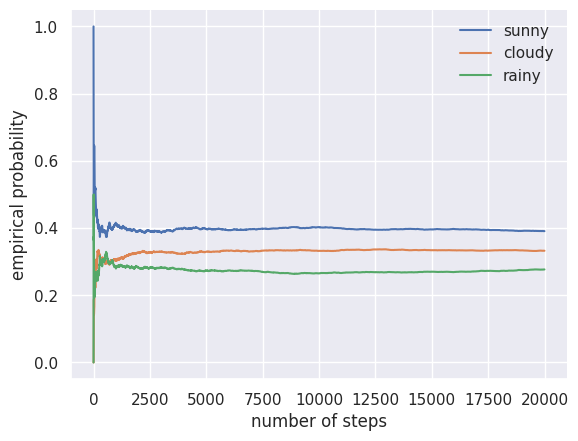

In [46]:
def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

fig, ax = plt.subplots()
width = 1000
offsets = range(1, n_steps, 5)
for i, label in enumerate(state_space):
    ax.plot(offsets, [np.sum(states[:offset] == i) / offset
            for offset in offsets], label=label)
ax.set_xlabel("number of steps")
ax.set_ylabel("empirical probability")
ax.legend(frameon=False)
despine(ax, ('top', 'right'))
plt.show()

---

Next we provide a brief review on how to use Markov Chain Monte Carlo (MCMC) to compute expectation values, and contrast with Monte Carlo integration. In statistics, we study the properties of random variables $x$ and their probability distributions $P(x)$.  We often care about computing expectation values of functions of the random variable such as
$$ \Large
\langle f(x) \rangle = \sum_x f(x) P(x)
$$

In general, the probability distribution $P(x)$ can be very complicated and difficult to sample efficiently. In this case, we can use Markov chains to represent the probability distribution $P(x)$.   It is possible to pick the transition probabilities of the Markov chain so that the chain’s equilibrium probability distribution is the desired probability distribution $P(x)$. Once we have a correctly defined Markov chain, we can sample it to obtain a set of sampled states $x_1,x_2,...,x_T$.  These sampled states can be used to estimate expectation values in the following way
$$ \Large
\langle f(x) \rangle \approx \frac{1}{T_{max}} \sum_{t=1}^{T_{max}} f(x_t)
$$

This should look familiar! However, you should be clear on the distinction between Monte Carlo and Markov chains:
- Monte Carlo methods are ways to evaluate integrals using random numbers.
- Markov chains are used to sample complicated probability distributions.

When Monte Carlo is used to integrate a probability distribution specified by a Markov chain, then it is called <span style="color:Violet">Markov Chain Monte Carlo</span>.

### <span style="color:LightGreen">Metropolis Algorithm</span>

Markov Chain Monte Carlo methods date back to a [seminal paper by Metropolis et al.](https://pdfs.semanticscholar.org/7b3d/c9438227f747e770a6fb6d7d7c01d98725d6.pdf), who developed the first MCMC algorithm, correspondingly called [Metropolis algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). It was proposed in 1953 by Edward Teller, Nicholas Metropolis, and others at Los Alamos National Laboratory in New Mexico during the early days of scientific computing. Teller and his physics colleagues were interested in using MCMC to calculate the thermodynamic properties of a weakly interacting classical gas, which was very difficult to calculate analytically. Impressively, more than half a century after its introduction, Metropolis MCMC is still in wide use today in many areas of science, engineering, and statistics.

The <span style="color:Violet">Metropolis algorithm</span> samples a Markov chain by proposing moves between states, which are then either accepted or rejected according to a specific criterion. These proposed moves are chosen so that the Markov chain’s transition probabilities give the correct equilibrium distribution4. In general, Metropolis Markov chain sampling of a probability distribution $P(S)$ works as follows:

1. Start at a state $𝑆_t$.

2. Propose a move to a new state $S'$ based on the current state $S_t$.

3. Choose a uniform random number $r$ between 0 and 1.

4. If $r<P(S')/P(S_t)$ then accept the proposed move and transition to state $S'$ so that $S_{t+1}=S'$. Otherwise, reject the move and stay at state $S_t$ so that $S_{t+1}=S_t$.

5. Increment $t$ and repeat.

This Markov chain’s samples $S_1,...S_{T_{max}}$ are then used to estimate expectation values $\langle f(S) \rangle$ in the way  discussed in the previous section. We will use this general Metropolis MCMC framework to sample the Boltzmann distribution, an important probability distribution in thermal physics.

## <span style="color:Orange">2D Ising Model</span>

### <span style="color:LightGreen">Ising Hamiltonian for a Ferromagnetic 2D System</span>

*Note: For a very good reference on this derivation (and where much of this notation comes from), [see here](https://farside.ph.utexas.edu/teaching/329/lectures/node110.html).  Other good references can be found in the "Additional Readings" section.*

Consider a system of ferromagnetic atoms, where each atom initially has spin up (+1) or down (-1).  Ferromagnetic means that the system wants to align all of the spins in the same direction to minimize energy, so that all of the spins should be up or all of the spins should be down.  If the net-magnetization of the system is zero, all of the spins cancel each other out.  If the net-magnetization of the system is greater than zero, then some percentage of the magnetic spins are aligned.

We want to be able to study the phase transition of the system from disordered (spins randomly oriented) to ordered (spins aligned), and vice versa. In order to do this, let's arrange the spins onto the grid points of a lattice as shown in the figure below.  Note that the picture shown is for a 2D system, but any useful dimensionality can be done.

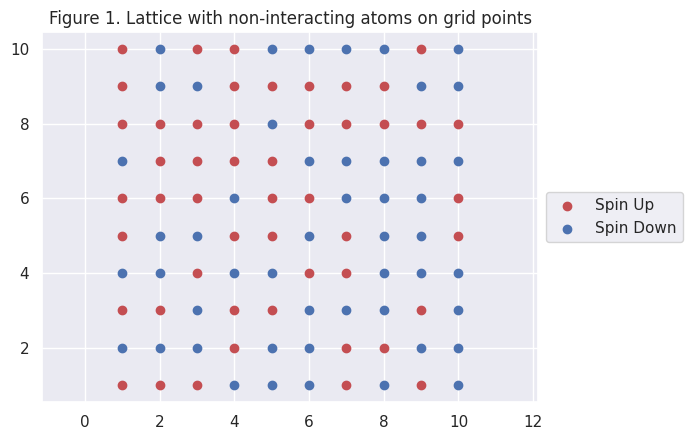

In [47]:
# Code to show an example lattice with non-interacting spins
spin_up_or_down = np.random.choice([0,1], size=(10,10))
xv, yv = np.meshgrid(np.linspace(1, 10, 10), np.linspace(1, 10, 10))
fig, ax = plt.subplots(1, 1)
ax.scatter(xv[np.reshape(spin_up_or_down, (10, 10)) == 1],
            yv[np.reshape(spin_up_or_down, (10, 10)) == 1],
            c='r', label="Spin Up")
ax.scatter(xv[np.reshape(spin_up_or_down, (10, 10)) == 0],
            yv[np.reshape(spin_up_or_down, (10, 10)) == 0],
            c='b', label="Spin Down")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis('equal')
plt.title("Figure 1. Lattice with non-interacting atoms on grid points")
plt.show()

To determine the energy of the $i^{th}$ atom in the system above, we start with the energy of the atom in a magnetic field

$$ \Large
\epsilon_i = \mu H \sigma_i
$$

where $\mu$ is the atomic magnetic moment, $H$ is an applied magnetic field, and the $\sigma$ operator "measures" the spin of the atom and returns value $+1$ for spin up or $-1$ for spin down.

Next, lets add a nearest-neighbors interaction between the particles, with strength $J$:

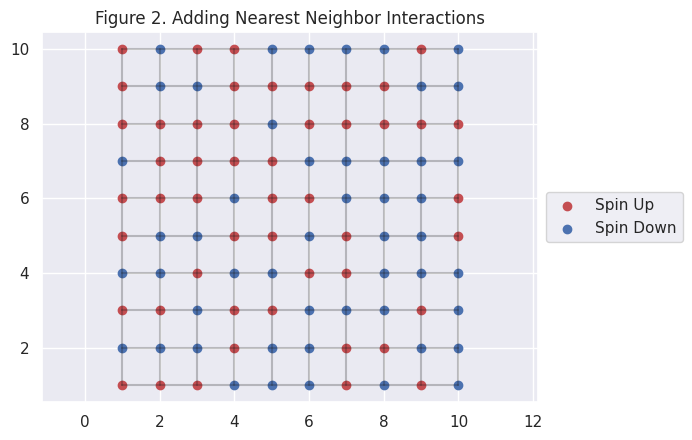

In [48]:
# Code to show add nearest-neighbors interactions to the above figure
fig, ax = plt.subplots(1, 1)

for x, y in zip(xv, yv):
    ax.plot(x, y, 'k', alpha=0.25)
    ax.plot(y, x, 'k', alpha=0.25)
ax.scatter(xv[np.reshape(spin_up_or_down, (10, 10)) == 1],
            yv[np.reshape(spin_up_or_down, (10, 10)) == 1],
            c='r', label="Spin Up")
ax.scatter(xv[np.reshape(spin_up_or_down, (10, 10)) == 0],
            yv[np.reshape(spin_up_or_down, (10, 10)) == 0],
            c='b', label="Spin Down")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis('equal')
plt.title("Figure 2. Adding Nearest Neighbor Interactions")
plt.show()

To include the energy from each site interacting with the $i$th atom, we can update the above expression:

$$ \Large
\epsilon_i = -\frac{1}{2}~J\sum_{j\in[1,4]} \sigma_i \sigma_j + \mu H \sigma_i
$$

where
- the $\frac{1}{2}$ factor ensures that we don't double count the contributions from neighboring atoms.

- $J$ is the coupling between nearest neighbors (the gray lines in Figure 2)

- The negative sign "$-$" in front of the $J$ means that this is a ferromagnetic system

- $j$ means that only four nearest neighbors for each atom in the above Figure will be included in the calculation


It's important to note here, that the $\sigma_i$ term can be pulled out of the sum and we can divide by the magnetic moment $\mu$:

$$ \Large
\mu = -\frac{1}{2 \mu}J \sigma_i \sum_{j\in[1,4]} \sigma_j
$$

So that the total energy for the $i^\text{th}$ spin can be written as

$$ \Large
\epsilon_i = \mu \sigma H_{eff}
$$

where

$$ \Large
H_{eff} = -\frac{1}{2 \mu}J \sum_{j\in[1,4]} \sigma_j + H
$$

which means that for atom $i$, the only difference in energy for the atom in a spin up state or spin down state is a $+$ or $-$ sign:

$$ \Large
\Large \epsilon_i\{\sigma_i, \uparrow \} = - \epsilon_i\{\sigma_i, \downarrow \}
$$

To get the total energy for the system, we sum over all the measured of the observed energies:

$$ \Large
E = \sum_i \epsilon_i
$$.

Using this Hamiltonian, we want to understand the expected spin value given the temperature of the system. The probability $p$ that a spin has a particular value can be calculated using the [Maxwell-Boltzmann distribution](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/03%3A_Rate_Laws/3.01%3A_Gas_Phase_Kinetics/3.1.02%3A_Maxwell-Boltzmann_Distributions)

$$ \Large
p_{i,\pm} = \frac{e^{\mp \epsilon_i/k_BT}}{\sum_i e^{\epsilon_i /k_B T}}
$$

where $\epsilon_i$ is the energy of the atom, and $k_BT$ is the energy environment (also referred to as a temperature bath) of the atom.  The denominator of the fraction normalizes the probability distribution, so that there is a max probability of 1.

The average value of the magnetic moment of the atom for a given temperature is

$$ \Large
\langle \mu \rangle = \frac{\mu p_+ + (-\mu)p_-}{p_+ + p_-}
$$

After plugging in the expression for the probability and evaluating the $\sigma_i$ operators appropriately, we get

$$ \Large
~~~~~~~~~~\langle \mu \rangle = \mu \frac{e^{- \mu H/k_BT} - e^{+ \mu H /k_BT}}{e^{- \mu H/k_BT} + e^{+ \mu H/k_BT}} \\
= \mu \tanh(\frac{\mu H}{k_B T})
$$

This is not an expression we can solve **analytically**, <span style="color:Violet">but it can be solved numerically</span>.

### <span style="color:LightGreen">Metropolis-Hastings Algorithm Walk-through</span>

This algorithm has multiple variations in addition to "[Metropolis-Hastings](https://pubs.aip.org/aip/jcp/article-abstract/21/6/1087/202680/Equation-of-State-Calculations-by-Fast-Computing?redirectedFrom=fulltext)", such as "[Stochastic Simulated Annealing](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)" and "[Sequential Simulated Annealing](https://link.springer.com/article/10.1007/s10898-011-9838-3)".  The "simulated annealing" comes from the idea that the system begins in a random state that is equivalent to the system being at infinitely high temperature. The system is then "submerged" into a bath of temperature $T$ where $T$ is a finite temperature that "cools" the system off.

---

0. Initialize the system with the following variables:
    - $T$: temperature of the "bath" which will anneal the system
    - $N$: the size of the system
    - $s$: the state of each particle in the system
    - $J$: the coupling between particles in the system
    - $H$: the applied magnetic field
1. Select an atom in the system
2. Calculate the energy $e_i$ of that atom
3. Determine if changing the spin of the atom would decrease the energy
4. If it decreases the energy **OR** if the probability of the state in the Boltzmann distribution is greater than a sample from a uniform probability distribution, then change the spin state of the atom.
5. Continue with steps 1-4 until the stopping criteria is met.
6. Return to step 0 and re-initialize the system with different variables as desired.
---
Let's go through these steps in code:

#### ___Step 0___: <span style="color:Tan">Initialize the lattice and the simulation</span>


We want a square, 10x10 lattice (N = 100). By calling the `np.random.uniform()` function, I know I will get an uniform distribution of values between 0 and 1

In [49]:
lattice = np.random.uniform(size=(10,10))

Next, we want to prepare the system into spin up and spin down

In [50]:
lattice[lattice>0.5]=1 # any values greater than 0.5, I set equal to 1
lattice[lattice !=1]=-1 # anything I don't change before, I make equal to -1

Last thing for the lattice is to visually check and see if everything turned out okay.  Every value in the lattice should be $+1$ or $-1$.

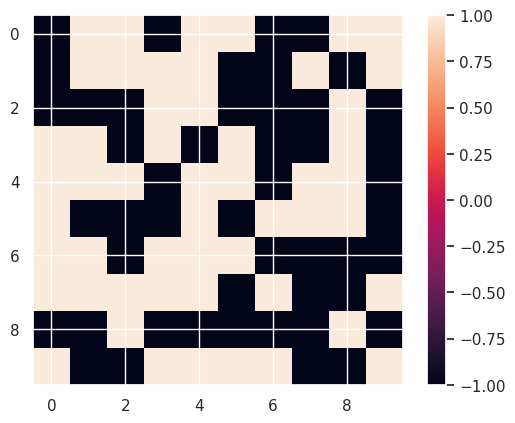

In [51]:
plt.imshow(lattice)
plt.colorbar()
plt.show()

Next, we are going to create a temperature variable. In the equations above, the inverse temperature is represented by $1/k_B T$, where $k_B$ is the Boltzmann constant. If $T = \inf$, then the inverse temperature will zero, and if $T=0$ then the inverse temperature will be $∞$.  Accordingly, we can define:

$$ \Large
\beta = 1/k_B T
$$

where we can artificially restrict $\beta \ge 0$ to make calculations simple.  We already know what the system is like at infinite temperature because we are starting out in a thermalized state, so this way as $T → 0$, $\beta$ will become very large.  For now, let's start with $\beta=0$, just to make sure things are working.

In [52]:
beta = 0 # thermodynamic inverse temperature variable

For right now, let's set $H=0$, $J=1$, and $\mu=1$.  This means I can omit them from my code, and proceed to step 1 of the algorithm.

#### ___Step 1___: <span style="color:Tan">Select an atom in the system</span>

This is where we need to make another coding decision. If we start with the atom at location (0, 0), then there are no neighbors located at (-1, 0) and (0, -1) because of how ```numpy``` matrices are indexed. This same thing will happen for all of the other atoms at the edges of my lattice: they are missing neighbors. So for right now, we will start in the *second* row and *second* column, then stop at the *second-to-last* row and *second-to-last* column. We won't be able to update the edge atoms with the lower energy configurations, but my code will run for right now.

#### ___Step 2 - 5___: <span style="color:Tan">See the code comments</span>

In [53]:
# --> Step 1: double for-loop
for r in range(1,9): # the range is from (1,9) instead of (0, 10)
  for c in range(1,9): # the range is from (1,9) instead of (0, 10)

        # --> Step 2: Calculate the energy of the atom
        # the sum over the nearest neighbors is completed first to make it easy to check
        sum_NN = (lattice[r-1,c]+lattice[r+1, c]+lattice[r,c+1]+lattice[r,c-1])

        # then the total energy for the atom is calculated
        E_a = -0.5*lattice[r,c]*sum_NN

        # --> Step 3: Change the spin and re-calculate the energy
        # Remember we said above that changing the spin just changes the sign
        # of the energy
        E_b = -1*E_a

        # --> Step 4: If the energy decreased or the probability sample
        # meets the requirement
        if E_b < E_a or np.exp(-(E_b - E_a)*(beta)) > np.random.rand():
            # Update the actual spin value in the lattice
            lattice[r, c] *= -1

        # --> Step 5: The stop condition for this code block is that all of the
        # interior atoms have been updated at least once

Next, we are going to visualize the system again to see if anything changed. Since we set the thermodynamic temperature at $\beta=0 → T = \infty$, it should still be in a mixed state.

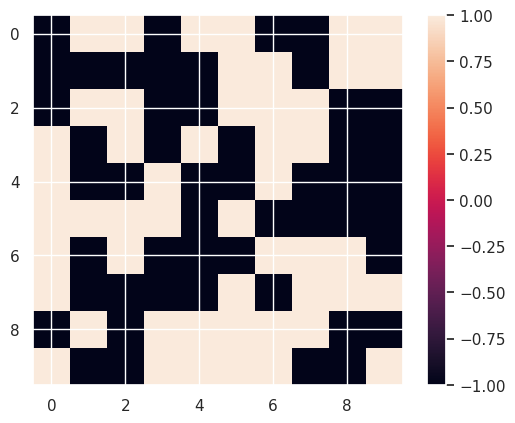

In [54]:
plt.imshow(lattice)
plt.colorbar()
plt.show()

Above, we implemented a Monte Carlo Markov Chain (MCMC) to update the atom's spin state. The state transition was considered based on sampling from both the Boltzmann distribution and the uniform distribution. The MCMC simulation allowed us to implement the Hamiltonian model for how we think the sytem should behave.

___<span style="color:Violet">EXAMPLE</span>___: Temperature Experiment

So far, so good!

Let's make some improvements to the code, and simulate the model for a range of temperatures.

In the code below, the variable `sqrt_N` = $\sqrt{N}$.  Since we have $N$ atoms in the system, the lattice has dimension $\sqrt{N} \times \sqrt{N}$.

In [ ]:
# Making the lattice a little larger
sqrt_N = 25

# Create a new lattice
init_lattice = np.random.uniform(size=(sqrt_N,sqrt_N))

#mask lattice
init_lattice[init_lattice>0.5]=1
init_lattice[init_lattice !=1]=-1

# A new step here to create non-interacting atoms around the edge by padding
# the array edges with zeroes.  This way, we can iterate over all N atoms in the
# system without causing an out-of-bounds error
lattice = np.zeros((sqrt_N+2, sqrt_N+2))
lattice[1:sqrt_N+1, 1:sqrt_N+1] = init_lattice

# Define a range of temperatures to test
beta = np.linspace(0, 2, 1000)

# Empty variable to hold the magnetism calculations
M = []

# For each temperature
for temp in tqdm(beta):

    # Repeat the MCMC step 100 times to make sure the system is stable
    for n in range(100):

        [rows, cols] = lattice.shape # Figure out the size of the lattice

        for r in range(1,rows-1): # keep the neighbors inside the region
            for c in range(1,cols-1):

                # sum over the nearest neighbors
                sum_NN = (lattice[r-1,c]+lattice[r+1, c]+lattice[r,c+1]+lattice[r,c-1])

                # calculate the energy
                E_a = -0.5*lattice[r,c]*sum_NN

                # re-calculate the energy for a spin state change
                E_b = -1*E_a

                # choose whether to keep the new state or not
                if E_b < E_a or (np.exp(-(E_b - E_a)*temp) > np.random.rand()):
                    lattice[r, c] *= -1

    # After the system is stable, calculate the net magnetism by summing over
    # all of the spin values and averaging them
    M.append(np.abs(np.sum(np.sum(lattice)))/(sqrt_N*sqrt_N))

 14%|█▎        | 137/1000 [00:37<03:37,  3.96it/s]

Plot the final lattice to see how the overall spin state has changed:

In [ ]:
plt.imshow(lattice)
plt.colorbar()
plt.show()

We can also plot the net-magnetism as a function of temperature, as shown below:

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.scatter(beta, M, s=1)
ax.set_xlabel(r"Inverse Temperature $\beta$", )
ax.set_ylabel("Net Magnetism M")
plt.show()

The plot above shows a noisy transition from 0 net magnetism at $\beta=0$ (or $T=\infty$), to completely magnetized by $\beta=2$.  The phase transition resembles the [$tanh$](https://mathworld.wolfram.com/HyperbolicTangent.html) function, but centered around 1.

---
## Acknowledgements
* Initial version: Mark Neubauer
* From APS DSECOP materials and https://people.duke.edu/~ccc14/sta-663-2016/15C_MonteCarloIntegration.html

© Copyright 2023